In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset1.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.shape

(243, 15)

In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
### indepndent and dependent features
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size= 0.25, random_state=42)

In [15]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [16]:
## feature selection based on correlation
corr = X_train.corr()

<Axes: >

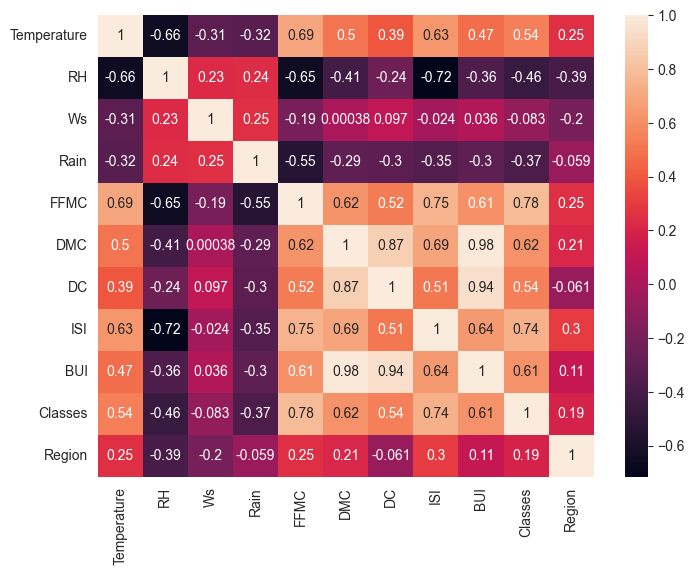

In [17]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.heatmap(corr, annot=True)

In [18]:
def make_selection(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname =corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = make_selection(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [20]:
X_train .drop(corr_features, axis =1, inplace=True)
X_test .drop(corr_features, axis =1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0.5, 1.0, 'X train after scaling')

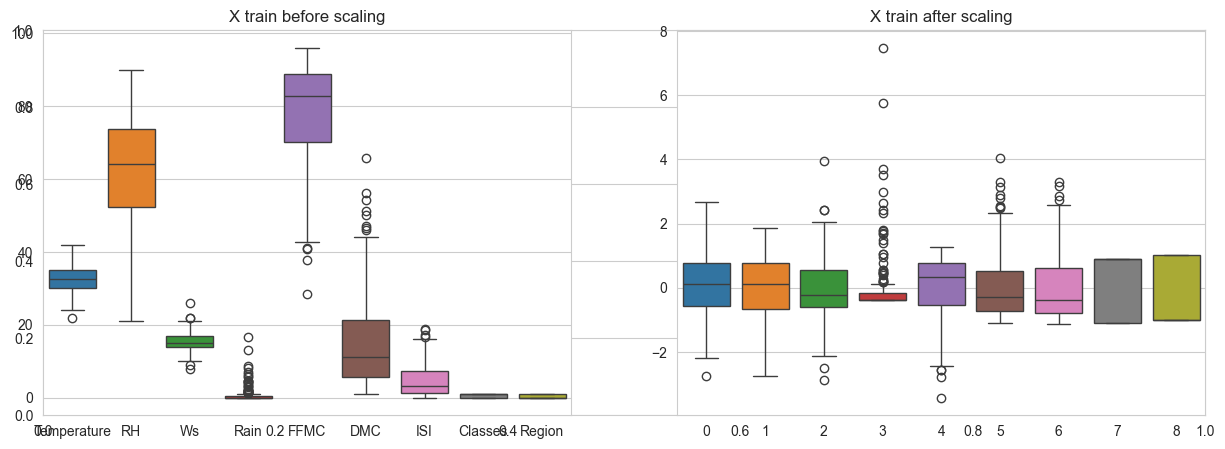

In [22]:
## Box plots to see effects of scaling
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X train after scaling')

In [23]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(score)

0.5468236465249978
0.674276687379158
0.8211435242265253
0.9847657384266951


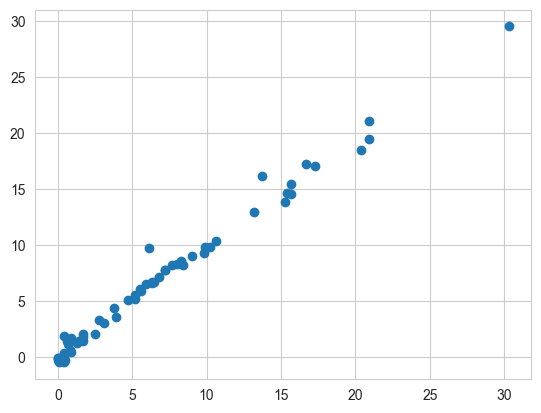

In [24]:
plt.scatter(y_test, y_pred)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse)
score_ridge = r2_score(y_test, y_pred_ridge)
print(mae_ridge)
print(mse_ridge)
print(rmse_ridge)
print(score_ridge)

0.5642305340105715
0.6949198918152096
0.8211435242265253
0.9842993364555512


In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse)
score_lasso = r2_score(y_test, y_pred_lasso)
print(mae_lasso)
print(mse_lasso)
print(rmse_lasso)
print(score_lasso)

1.133175994914409
2.2483458918974772
0.8211435242265253
0.9492020263112388


In [27]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)
y_pred_lassocv = lassocv.predict(X_test_scaled)
mae_lassocv = mean_absolute_error(y_test, y_pred_lassocv)
mse_lassocv = mean_squared_error(y_test, y_pred_lassocv)
rmse_lassocv = np.sqrt(mse)
score_lassocv = r2_score(y_test, y_pred_lassocv)
print(mae_lassocv)
print(mse_lassocv)
print(rmse_lassocv)
print(score_lassocv)

0.619970115826343
0.792499555474362
0.8211435242265253
0.9820946715928275


In [28]:
lassocv.alpha_

np.float64(0.05725391318234408)

0.5642305340105715
0.6949198918152096
0.8211435242265253
0.9842993364555512


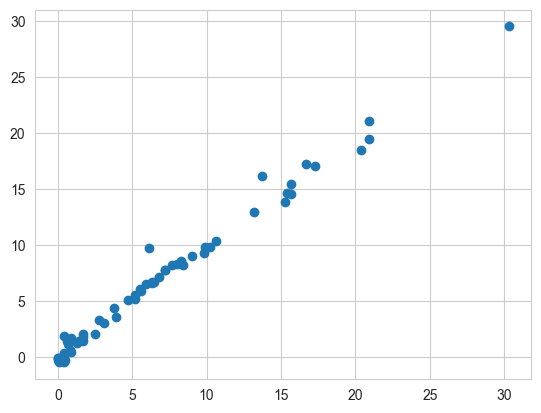

In [35]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred_ridgecv = ridgecv.predict(X_test_scaled)
mae_ridgecv = mean_absolute_error(y_test, y_pred_ridgecv)
mse_ridgecv = mean_squared_error(y_test, y_pred_ridgecv)
rmse_ridgecv = np.sqrt(mse)
score_ridgecv = r2_score(y_test, y_pred_ridgecv)
print(mae_ridgecv)
print(mse_ridgecv)
print(rmse_ridgecv)
print(score_ridgecv)
plt.scatter(y_test, y_pred)

In [38]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

0.6575946731430898
0.8222830416276258
0.8211435242265253
0.9814217587854941


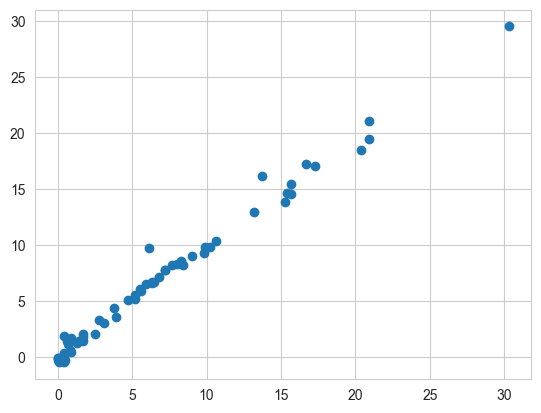

In [39]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
elastic = ElasticNetCV(cv = 5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)
mae_elastic= mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse)
score_elastic = r2_score(y_test, y_pred_elastic)
print(mae_elastic)
print(mse_elastic)
print(rmse_elastic)
print(score_elastic)
plt.scatter(y_test, y_pred)

In [40]:
## pickle the machine learning model, scaling model
scaler

StandardScaler()

In [41]:
ridge

Ridge()

In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(ridge,open('ridge.pkl', 'wb'))